In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [151]:
#loading offensive stats
df17 = pd.read_csv("../season_stats_1718.csv", sep=",")
#loading defensive stats
df17_opp = pd.read_csv("../season_stats_opp_1718.csv", sep=",")

#loading expanded stats
df_exp = pd.read_csv("../expanded_standings_17.csv", sep=",", header=[0,1])


#and cleaning 
df17 = df17.replace('\n','', regex=True)
df17 = df17.replace('\*','', regex=True)

df17_opp = df17_opp.replace('\n','', regex=True)

df_exp = df_exp.replace('\n','', regex=True)
df_exp = df_exp.replace('\*','', regex=True)


df17_opp.rename(columns={'PTS': 'PTS_allowed'}, inplace=True)


In [152]:

df17_opp.columns = list(map(lambda name: name + "_opp", df17_opp.columns ))


In [153]:
df_exp.columns

MultiIndex(levels=[['All-Star', 'Away', 'Conference', 'Division', 'Home', 'Margin', 'Month', 'Overall', 'Unnamed: 0_level_0', 'Unnamed: 1_level_0'], ['A', 'Apr', 'C', 'Dec', 'E', 'Feb', 'Jan', 'L', 'Mar', 'NW', 'Nov', 'Oct', 'P', 'Post', 'Pre', 'Rk', 'SE', 'SW', 'Team', 'W', '≤3', '≥10']],
           labels=[[8, 9, 7, 7, 4, 4, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 5, 5, 6, 6, 6, 6, 6, 6, 6], [15, 18, 19, 7, 19, 7, 19, 7, 4, 19, 0, 2, 16, 9, 12, 17, 14, 13, 20, 21, 11, 10, 3, 6, 5, 8, 1]])

In [154]:
#join Points allowed to df17
#df17_opp = df17_opp[["Team", "PTS_allowed"]]

df17 = pd.merge(df17, df17_opp, how="left", left_on=['Team'], right_on = ["Team_opp"])



In [155]:
df17 = pd.merge(df17, df_exp, how="left", left_on=["Rk"], right_on=[("Unnamed: 0_level_0", "Rk")])

/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:558: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


# Feature List 

- home court advantage: 0.10218887
- ***effective field goal percentage difference: 0.16118265***
- ***turnover percentage difference: -0.05958713***
- ***offensive rebound percentage difference: 0.07061777***
- free throws to field goals attempts difference: 0.03267933
- distance traveled in last 7 days difference: -0.01459163
- form in last seven matches difference: 0.0828436
- ***offensive rating difference: 0.17885523***
- ***defensive rating difference: -0.33924331***
- effective field goal percentage difference (court*): 0.10808104
- turnover percentage difference (court*): -0.09548481
- offensive rebound percentage difference (court*): 0.07055131
- free throws to field goals attempts difference (court*): 0.0748545
- form in last seven matches difference (court*): -0.00486437
- offensive rating difference (court*): 0.14822224
- defensive rating difference (court*): -0.21756487

*Considering court situation means that, for example if Team A is the host and Team B is the visitor the effective field goal percentage would be: A effective field goal percentage when playing at home — B effective field goal percentage on the road)

https://hackernoon.com/how-to-predict-the-nba-with-a-machine-learning-system-written-in-python-part-ii-f276b19520b9

In [156]:
df = df17["Team"]


In [157]:
df17["POS"] = 0.96*(df17["FGA"] - df17["ORB"] + df17["TOV"]+(0.44 * df17["FTA"]))
df17["POS"] = 0.96*(df17["FGA"] - df17["ORB"] + df17["TOV"]+(0.44 * df17["FTA"]))
#calculationg possessions per team and adding new row POS


#More specific Possessions 
df17["SPOS"] = 0.5*((df17["FGA"] + 0.4*df17["FTA"] - 1.07*(df17["ORB"]/(df17["ORB"]+df17["DRB"]))*(df17["FGA"]-df17["FG"])+df17["TOV"])+(df17["FGA_opp"] + 0.4*(df17["FTA_opp"])-1.07*(df17["ORB_opp"]/(df17["ORB_opp"]+df17["DRB_opp"]))*(df17["FGA_opp"]-df17["FG_opp"])+df17["TOV_opp"]))

#0.5*((Field Goal Attempts + 0.4*Free Throw Attempts – 1.07*(Offensive Rebounds/(Offensive Rebounds + Opponent Defensive Rebounds))*(Field Goal Attempts – FG) + Turnovers) + (Opponent Field Goal Attempts + 0.4*(Opponent Free Throw Attempts) – 1.07*(Opponent Offensive Rebounds)/(Opponent Offensive Rebounds + Defensive Rebounds))*(Opponent Field Goal Attempts – Opponent FG) + Opponent Turnovers))

#https://www.nbastuffer.com/analytics101/possession/

In [158]:
#Offensive Rating 
df17["OFFRAT"] = (df17["PTS"] * 100)/df17["SPOS"]

#Defensive Rating
df17["DEFRAT"] = (df17["PTS_allowed_opp"] * 100)/df17["SPOS"] 

Effective Field-Goal Percentage (eFG%) accounts for the fact that 3-pointers are worth an extra point, something ignored by traditional field-goal percentage. Why is this important? Imagine a situation where one player shoots 6 layups, and makes 3 of them, while another player shoots 6 three point shots and makes 2 of them. Both players have scored 6 points on 6 shots, yet the first player's FG% is 50 percent, and the second player's FG% is only 33 percent. The second player looks like a terrible shooter even though he has scored just as many points on just as many shots. Effective field-goal percentage corrects for this by accounting for the extra point that 3-pointers are worth.

The formula is:

In [159]:
#effective Fieldgoal Percentage
df17["eFG%"] = (df17["FG"] + 0.5 * df17["3P"])/df17["FGA"]

In [160]:
#True Shooting percentage - freethrows included
df17["TSP"] = df17["PTS"]/(2*(df17["FGA"]+(0.44*df17["FTA"])))

In [161]:
#Offensive Rebound Percentage
df17["ORB%"] = df17["ORB"]/df17["SPOS"]

In [162]:
#Turnover Percentage
df17["TO%"] = df17["TOV"]/df17["SPOS"]

#***Sind Turnover gut oder nicht????*** GUT !! 

In [163]:
#PACE - Possessions per 48 Minutes 
df17["PACE"] = df17["SPOS"]/(df17["MP"]/48)

In [164]:
#Point Differential - Eventually per game because some teams won with small margin and lost big so they are good but have a low pdiff ... probably per game stats and big margins out 

df17["PDIFF"] = (df17["PTS"] - df17["PTS_allowed_opp"])/82

In [165]:
#Projected Winning Percentage
df17["PW%"] = (((df17["PDIFF"])*2.7)+41)/82

In [171]:
#Win-Loss Ratio 
df17["WinLossRatio"] = df17["Overall","W"]-df17["Overall","L"]


In [172]:
df17

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,OFFRAT,DEFRAT,eFG%,TSP,ORB%,TO%,PACE,PDIFF,PW%,WinLossRatio
0,1,Golden State Warriors,82,19780,3532,7140,0.495,982,2562,0.383,...,115.699973,104.084928,0.563445,0.597372,0.093748,0.147440,19.931612,11.634146,0.883076,52.0
1,2,Houston Rockets,82,19780,3305,7152,0.462,1181,3306,0.357,...,114.745475,109.006988,0.544673,0.583116,0.108218,0.150438,20.002243,5.768293,0.689932,40.0
2,3,Denver Nuggets,82,19755,3377,7194,0.469,870,2365,0.368,...,113.166093,112.647265,0.529886,0.567748,0.119330,0.151448,19.669384,0.512195,0.516865,28.0
3,4,Cleveland Cavaliers,82,19880,3275,6963,0.470,1067,2779,0.384,...,113.600867,110.323919,0.546963,0.579649,0.096174,0.140746,19.230731,3.182927,0.604804,24.0
4,5,Washington Wizards,82,19855,3388,7137,0.475,756,2030,0.372,...,111.155775,109.318284,0.527673,0.564197,0.104662,0.144268,19.471881,1.804878,0.559429,20.0
5,6,Los Angeles Clippers,82,19755,3242,6820,0.475,841,2245,0.375,...,112.720062,108.267424,0.537023,0.574435,0.093354,0.134338,19.208322,4.292683,0.641344,20.0
6,7,Boston Celtics,82,19755,3168,6978,0.454,985,2742,0.359,...,111.140567,108.430127,0.524577,0.566643,0.093360,0.136526,19.363249,2.634146,0.586734,20.0
7,8,Portland Trail Blazers,82,19930,3243,7059,0.459,852,2272,0.375,...,110.255669,110.791314,0.519762,0.559298,0.103392,0.140264,19.334162,-0.524390,0.482733,20.0
8,9,Phoenix Suns,82,19830,3270,7260,0.450,615,1854,0.332,...,106.606647,112.183849,0.492769,0.537822,0.117821,0.152709,20.051373,-5.634146,0.314485,16.0
9,10,Toronto Raptors,82,19780,3211,6918,0.464,725,1996,0.363,...,112.260229,107.840030,0.516551,0.560925,0.111594,0.133375,18.940536,4.207317,0.638534,12.0


# Calculating Team Difference

In [72]:
def teamscore_diff(x,y):
    scores=[]
    scores.append(((df17["OFFRAT"][x]-df17["OFFRAT"][y]))*3) #Offensive Rate with weight
    scores.append(((df17["DEFRAT"][x]-df17["DEFRAT"][y]))*1.5) #Defensive Rate with weight
    scores.append(((df17["eFG%"][x]-df17["eFG%"][y]))*1.3) #Effecive Fieldgoal Percentage with weight
    scores.append(((df17["TSP"][x]-df17["TSP"][y]))*1.3) #True Shot Percentage with weight
    scores.append(((df17["TO%"][x]-df17["TO%"][y]))*2) #Turnover % with weight
    scores.append(((df17["ORB%"][x]-df17["ORB%"][y]))*1.5) #Offensive Rebound % with weight
    scores.append(((df17["PACE"][x]-df17["PACE"][y]))*1.5) #PACE with weight
    return scores




https://adeshpande3.github.io/Applying-Machine-Learning-to-March-Madness

### 2017 Playoff Matches

In [78]:
#Golden State Warriors vs. Portland Trail Blazers 
GSW_PTB = teamscore_diff(0,7)
sum(GSW_PTB)

7.275681753810679

In [79]:
#Utah Jazz vs. Los Angeles Clippers
UJ_LAC = teamscore_diff(27,5)
sum(UJ_LAC)

-15.120204214748743

In [80]:
#Cleveland Cavaliers vs. Indiana Pacers
CC_IP = teamscore_diff(3,14)
sum(CC_IP)

17.376821362337175

# Visual Analysis

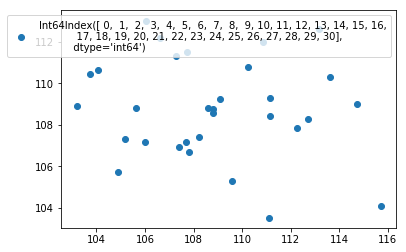

In [96]:

x = df17["OFFRAT"]
y = df17["DEFRAT"]



plt.scatter(x,y, label=df17.index)

plt.legend(loc=1)

plt.show()